In [70]:
#Uber needs to identify the reasons for driver churn and find differences between drivers who leave the service and those who stay.
#We will formulate and test hypotheses and identify groups of drivers who are most susceptible to churn.
#Data Description:
#city – city
#phone – the primary device used by the driver
#signup_date – account registration date (YYYYMMDD)
#last_trip_date – date of the last trip (YYYYMMDD)
#avg_dist – average distance (in miles) per trip in the first 30 days after registration
#avg_rating_by_driver – average rating given by the driver for trips
#avg_rating_of_driver – average rating received by the driver for trips
#surge_pct – percentage of trips taken with a surge multiplier >1 (likely during peak hours)
#avg_surge – average surge multiplier for all trips taken by the driver
#trips_in_first_30_days – number of trips completed by the driver in the first 30 days after registration
#luxury_car_user – TRUE if the driver used a premium car in the first 30 days
#weekday_pct – percentage of the user's trips taken on weekdays

In [269]:
%pip install plotly
%pip install seaborn
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [270]:
df_churn = pd.read_csv('churn.csv')
df_churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [271]:
# We will check the data for size, missing values, and count unique values
df_churn.shape

(50000, 12)

In [272]:
df_churn.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [273]:
df_churn.nunique()

avg_dist                  2908
avg_rating_by_driver        27
avg_rating_of_driver        37
avg_surge                  115
city                         3
last_trip_date             182
phone                        2
signup_date                 31
surge_pct                  367
trips_in_first_30_days      59
luxury_car_user              2
weekday_pct                666
dtype: int64

In [274]:
# We will check the data types
df_churn.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user              bool
weekday_pct               float64
dtype: object

In [275]:
# We will change the type for date columns
df_churn.last_trip_date = pd.to_datetime(df_churn.last_trip_date)
df_churn.signup_date = pd.to_datetime(df_churn.signup_date)

In [276]:
# Prints information about the DataFrame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    49799 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   city                    50000 non-null  object        
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             50000 non-null  datetime64[ns]
 8   surge_pct               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  luxury_car_user         50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [277]:
df_churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,2014-04-19 08:02:04.992000256,2014-01-16 13:04:20.352000,8.849536,2.278200,60.926084
min,0.000000,1.000000,1.000000,1.000000,2014-01-01 00:00:00,2014-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,2014-02-14 00:00:00,2014-01-09 00:00:00,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,2014-05-08 00:00:00,2014-01-17 00:00:00,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,2014-06-18 00:00:00,2014-01-24 00:00:00,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,2014-07-01 00:00:00,2014-01-31 00:00:00,100.000000,125.000000,100.000000
std,5.707357,0.446652,0.617338,0.222336,NaN,NaN,19.958811,3.792684,37.081503


In [278]:
df_churn.describe(include='object')

,city,phone
count,50000,49604
unique,3,2
top,Winterfell,iPhone
freq,23336,34582


In [279]:
df_churn.describe(include='datetime')

,last_trip_date,signup_date
count,50000,50000
mean,2014-04-19 08:02:04.992000256,2014-01-16 13:04:20.352000
min,2014-01-01 00:00:00,2014-01-01 00:00:00
25%,2014-02-14 00:00:00,2014-01-09 00:00:00
50%,2014-05-08 00:00:00,2014-01-17 00:00:00
75%,2014-06-18 00:00:00,2014-01-24 00:00:00
max,2014-07-01 00:00:00,2014-01-31 00:00:00


In [280]:
# Create a churn label – a user is considered to have left if they have not been active in the last 30 days

In [281]:
df_churn.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [282]:
df_churn['days_since_last_trip'] = df_churn.last_trip_date.max() - df_churn.last_trip_date
df_churn['days_since_last_trip']

0        14 days
1        57 days
2       175 days
3         2 days
4       108 days
          ...   
49995    26 days
49996   157 days
49997    40 days
49998   167 days
49999    72 days
Name: days_since_last_trip, Length: 50000, dtype: timedelta64[ns]

In [290]:
df_churn['churn'] = df_churn.days_since_last_trip.apply(lambda x: 'churn' if x > 30 else 'not_churn')
df_churn[['days_since_last_trip', 'churn']]

,days_since_last_trip,churn
0,14,not_churn
1,57,churn
2,175,churn
3,2,not_churn
4,108,churn
...,...,...
49995,26,not_churn
49996,157,churn
49997,40,churn
49998,167,churn


In [292]:
# We see that many users have not used the service in the last month. Let's figure out what factors might influence driver churn
df_churn.churn.value_counts(normalize=True).mul(100)

churn
churn        62.392
not_churn    37.608
Name: proportion, dtype: float64

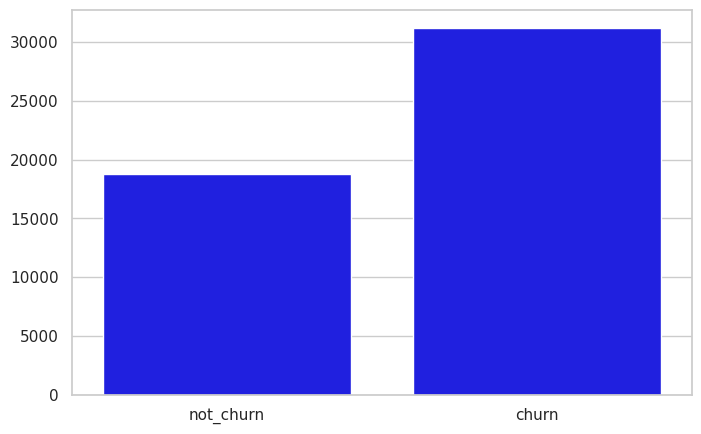

In [293]:
plt.figure(figsize=(8, 5))
sns.countplot(x='churn', data=df_churn, color='blue')  
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(ticks=[0, 1], labels=["not_churn", "churn"])
plt.show()

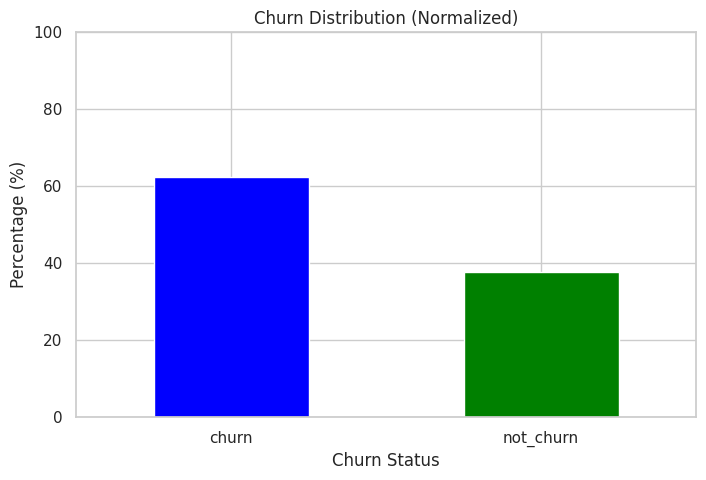

In [294]:
# We will reflect normalized values on the graph (so that we compare proportions instead of raw numbers)
churn_counts = df_churn.churn.value_counts(normalize=True).mul(100)


plt.figure(figsize=(8, 5))
churn_counts.plot(kind='bar', color=['blue', 'green'])

plt.xlabel("Churn Status")
plt.ylabel("Percentage (%)")
plt.title("Churn Distribution (Normalized)")
plt.ylim(0, 100) 
plt.xticks(rotation=0)  
plt.show()

In [295]:
# Let's assume that the problem may be among users on a specific platform
pd.crosstab(df_churn.churn, df_churn.phone)

phone,Android,iPhone
churn,,
churn,11876,19057
not_churn,3146,15525


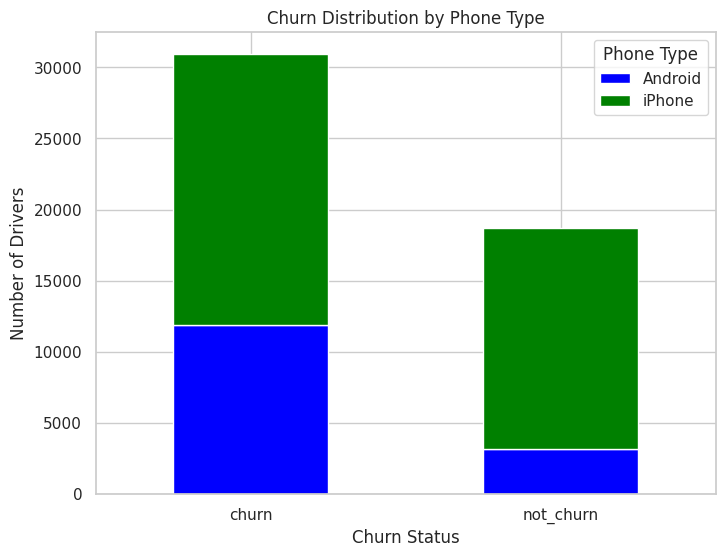

In [296]:
churn_counts_phone = df_churn.groupby(['churn', 'phone']).size().unstack()

# Строим stacked bar chart
ax = churn_counts_phone.plot(kind='bar', stacked=True, figsize=(8, 6), color=['blue', 'green'])

plt.xlabel("Churn Status")
plt.ylabel("Number of Drivers")
plt.title("Churn Distribution by Phone Type")
plt.legend(title="Phone Type")
plt.xticks(rotation=0)

plt.show()

In [297]:
# It is not good to draw conclusions only from the graph, so we will test our hypothesis using a statistical test.
# There are two categorical variables → we need a Chi-square test

# H₀ – There is no relationship between the variables
#H₁ – There is a relationship

from scipy.stats import chi2_contingency, chi2 
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_churn.churn, df_churn.phone))
stat, p

(np.float64(2558.394212267425), np.float64(0.0))

In [298]:
#Interpretation of results:
"""prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Reject H0')
else:
    print('Not reject H0')"""

"prob = 0.95\ncritical = chi2.ppf(prob, dof)\nif abs(stat) >= critical:\n    print('Reject H0')\nelse:\n    print('Not reject H0')"

In [299]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Reject H0')
else:
    print('Not reject H0')

Reject H0


In [300]:
# We will check whether there are differences in churn rates across different cities (churn, city)

pd.crosstab(df_churn.churn, df_churn.city)

city,Astapor,King's Landing,Winterfell
churn,,,
churn,12306,3767,15123
not_churn,4228,6363,8213


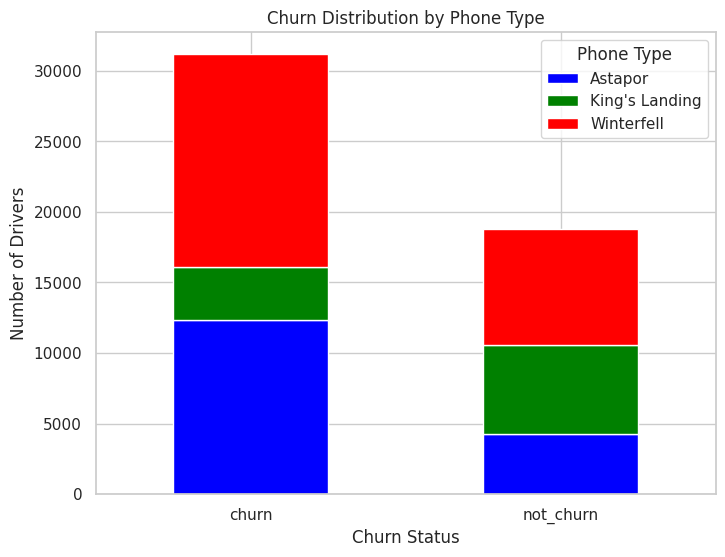

In [301]:
churn_counts_city = df_churn.groupby(['churn', 'city']).size().unstack()

# Строим stacked bar chart
ax = churn_counts_city.plot(kind='bar', stacked=True, figsize=(8, 6), color=['blue', 'green', 'red'])

plt.xlabel("Churn Status")
plt.ylabel("Number of Drivers")
plt.title("Churn Distribution by Phone Type")
plt.legend(title="Phone Type")

# Делаем подписи горизонтальными
plt.xticks(rotation=0)

plt.show()

In [302]:
#Again, since both churn and city are categorical variables, we use the Chi-Square test:
#H₀: No relationship between city and churn.
#H₁: There is a relationship between city and churn.

stat, p, dof, expected = chi2_contingency(pd.crosstab(df_churn.churn, df_churn.city))
stat, p

(np.float64(3821.5510225559633), np.float64(0.0))

In [303]:
# Interpretation of results:
"""prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Reject H0')
else:
    print('Not reject H0')"""

"prob = 0.95\ncritical = chi2.ppf(prob, dof)\nif abs(stat) >= critical:\n    print('Reject H0')\nelse:\n    print('Not reject H0')"

In [304]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Reject H0')
else:
    print('Not reject H0')

Reject H0


In [305]:
# For this hypothesis test, we use the Chi-square test, since both variables are categorical.
# The null hypothesis is rejected because p-value < 0.05, meaning there is a relationship.

<ipython-input-306-8208674c712c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




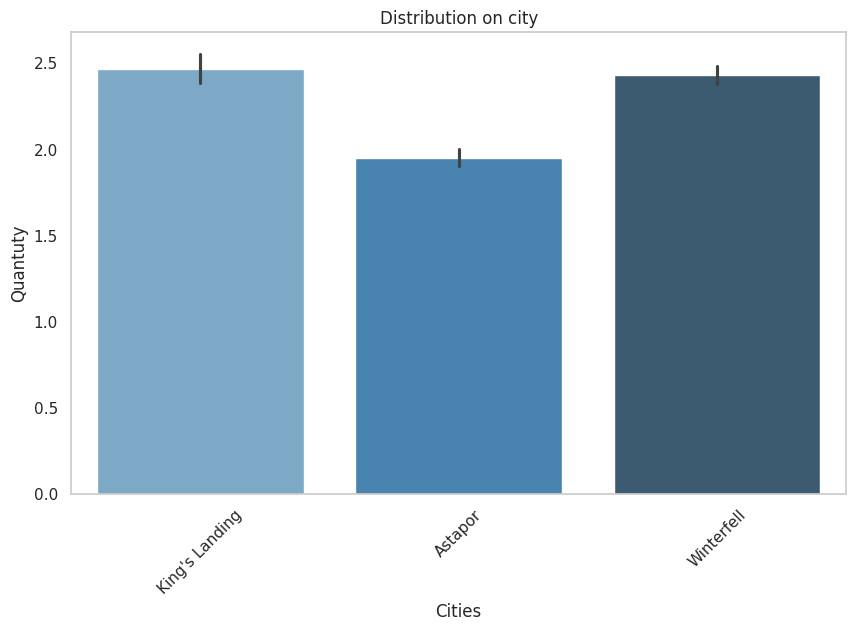

In [306]:
# Draw histagram
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='trips_in_first_30_days', data=df_churn, palette='Blues_d')
plt.title('Distribution on city')
plt.xlabel('Cities')
plt.ylabel('Quantuty')
plt.xticks(rotation=45)
plt.grid(axis='y')
# Show the graph
plt.show()

<ipython-input-307-2377c4c17f1c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




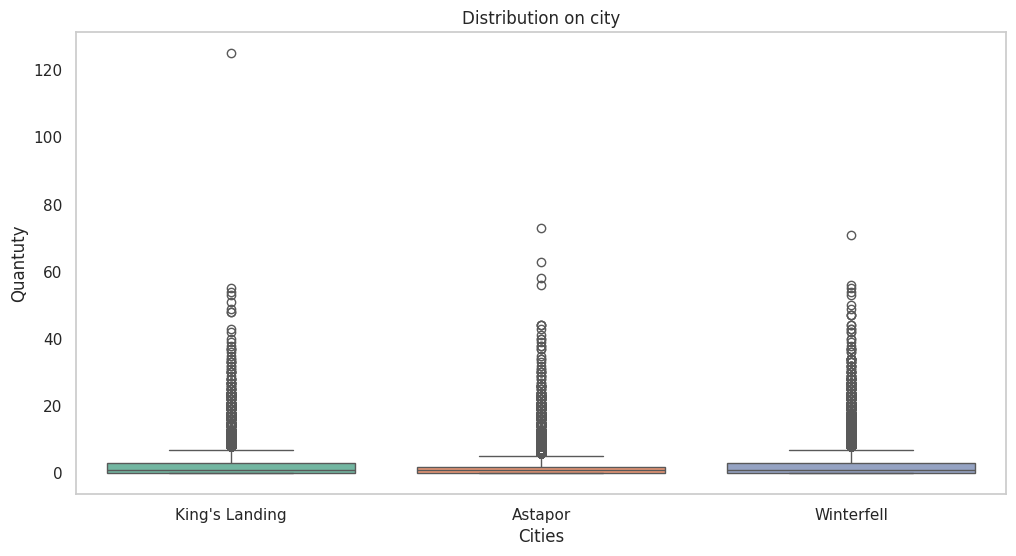

In [307]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='trips_in_first_30_days', data=df_churn, palette='Set2')
plt.title('Distribution on city')
plt.xlabel('Cities')
plt.ylabel('Quantuty')
plt.grid(axis='y')
plt.show()

In [308]:
# The distributions are not normal, so we might consider a Kruskal-Wallis test.
from scipy.stats import kruskal

kings_landing = df_churn[df_churn['city'] == "King's Landing"]['trips_in_first_30_days']
astapor = df_churn[df_churn['city'] == 'Astapor']['trips_in_first_30_days']
winterfell = df_churn[df_churn['city'] == 'Winterfell']['trips_in_first_30_days']

# Performing the Kruskal-Wallis test
statistic, p_value = kruskal(kings_landing, astapor, winterfell)

# Results summary
print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")

Statistic: 221.32105325317454
p-value: 8.724567791938856e-49


In [309]:
# Statistically significant differences were found, since the p-value < 0.05, meaning we can reject the null hypothesis.

In [310]:
#Could churn be related to activity in the first 30 days after registration (churn, trips_in_first_30_days)?
#The distribution of the trips_in_first_30_days variable is not normal, so we will use the Mann-Whitney U test.
    
from scipy.stats import mannwhitneyu

# Splitting the data into two groups
churn = df_churn[df_churn['churn'] == 'churn']['trips_in_first_30_days']
not_churn = df_churn[df_churn['churn'] == 'not_churn']['trips_in_first_30_days']

# Checking the sample sizes
print(f"Sample size of churn: {len(churn)}")
print(f"Sample size of not_churn: {len(not_churn)}")

# Ensure the samples are of equal size
if len(churn) > 0 and len(not_churn) > 0:
    # Performing the Mann-Whitney U test
    stat, p_value = mannwhitneyu(churn, not_churn)
    print(f"Statistic: {stat}, p-value: {p_value}")
else:
    print("One of the samples is empty, the test cannot be conducted.")


Sample size of churn: 31196
Sample size of not_churn: 18804
Statistic: 234767452.0, p-value: 0.0


In [311]:
# The result was statistically significant.
# Churned users were less active.
# Since the distribution of trips_in_first_30_days is not normal, we use the Mann-Whitney U test instead of a t-test.
# The result was statistically significant, meaning there are significant differences – churned users were less active.

# Comment:
# At this stage, we need to compare quantitative values between two groups.
# Since the data is not normally distributed, the Mann-Whitney U test is appropriate (understanding that we are not comparing means).
# p-value < 0.05, so we can reject the null hypothesis and conclude that there are statistically significant differences in user activity.
# Using CLES, we can conclude that churned users were less active.

In [312]:
# Group Sizes
n1 = len(churn)
n2 = len(not_churn)

# CLES Calculation
u_stat = 234767452.0
cles = u_stat / (n1 * n2)
print(f"CLES: {cles}")

CLES: 0.40021073368620586


In [313]:
# Interpreting CLES
# If CLES is close to 0.5, this indicates no significant differences between groups.
# If CLES is significantly greater than 0.5, this indicates that values in the first group (Group A) tend to be higher than those in the second group (Group B).
# If CLES is significantly less than 0.5, this indicates that values in the first group tend to be lower than those in the second group.